In [1]:
# sys, file and nav packages:
import datetime as dt
import locale

# math packages:
import pandas as pd
import numpy as np
import math

# charting:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib import ticker
from matplotlib import colors
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.gridspec import GridSpec
import seaborn as sns

# home brew utitilties
import resources.chart_kwargs as ck
import resources.sr_ut as sut

# images and display
from PIL import Image as PILImage
from IPython.display import Markdown as md
from IPython.display import display

loc = locale.getlocale()
lang =  'de_CH.utf8'
locale.setlocale(locale.LC_ALL, lang)

# the date is in iso standard:
d = "%Y-%m-%d"

# it gets changed to german format
g = "%d.%m.%Y"


# set some parameters:
# today = dt.datetime.now().date().strftime("%Y-%m-%d")
start_date = "2020-03-01"
end_date ="2021-05-31"

ge_start = "01.03.2020"
ge_end ="31.05.2021"

a_fail_rate = 50

# the city, lake and river bassin we are aggregating to
# the keys are column names in the survey data
levels = {"city":"Biel/Bienne","water_name_slug":'bielersee', "river_bassin":'aare'}
level_names = ["Biel / Bienne", "Bielersee","Erhebungsgebiet Aare"]
top = "Alle Erhebungsgebiete"

# colors for gradients
cmap2 = ck.cmap2
colors_palette = ck.colors_palette

(keyindicatorsde)=
# Statistische Schlüsselindikatoren

<a href="key_indicators.html"> English </a>

Die Schlüsselindikatoren sind einfach zu berechnen und werden direkt aus den Erhebungsergebnissen entnommen. Sie sind für die Identifizierung von Akkumulationszonen im Wassereinzugsgebiet unerlässlich. Wenn sie im Rahmen eines Abfallüberwachungsprogramms verwendet und mit spezifischen Kenntnissen über die Umgebung kombiniert werden, helfen die Schlüsselindikatoren, potenzielle Abfallquellen zu identifizieren. {cite}`mlwguidance`

Auswertungen von Strand-Abfallaufkommen Untersuchungen beschreiben den Ort, die Häufigkeit und die Zusammensetzung der gefundenen Gegenstände {cite}`eubaselines`. Die Schlüsselindikatoren beantworten die folgenden Fragen:

*  Welche Gegenstände werden gefunden? 
*  Wie viel wird gefunden? (Gesamtgewichte und Anzahl der Artikel) 
*  Wie oft werden diese Gegenstände gefunden? 
*  Wo sind diese Gegenstände in den grössten Konzentrationen zu finden? 
   
Ähnlich wie bei der Zählung von Vögeln oder Wildblumen muss eine Person die Erhebung durchführen, um die Zielobjekte finden und dann identifizieren. Dieser Prozess ist gut dokumentiert und wurde unter vielen Bedingungen getestet. {cite}`ryan2015` {cite}`Rech`.

__Indikatoren für die am häufigsten gestellten Fragen__

Die Schlüsselindikatoren geben Antworten auf die am häufigsten gestellten Fragen zum Zustand der Abfälle in der natürlichen Umwelt. Die Schlüsselindikatoren sind:

1. Anzahl der Proben 
2. Bestehens- und Misserfolgsquote (Fail-Rate) 
3. Anzahl der Objekte pro Meter (pcs/m oder pcs/m²) 
4. Zusammensetzung (% der Gesamtmenge) 

__Annahmen zu den Schlüsselindikatoren:__

Die Zuverlässigkeit dieser Indikatoren beruht auf den folgenden Annahmen:

1. Je mehr Abfallobjekte auf dem Boden liegen, desto grösser ist die Wahrscheinlichkeit, dass eine Person sie findet. 
2. Die Datenerhebung Ergebnisse stellen die Mindestmenge an Abfallobjekten an diesem Standort dar 
3. Die Besichtiger befolgen das Protokoll und zeichnen die Ergebnisse genau auf 
4. Für jede Datenerhebung: Das Auffinden eines Artikels hat keinen Einfluss auf die Wahrscheinlichkeit, einen anderen zu finden {cite}`iid`

__Verwendung der Schlüsselindikatoren__

Die Schlüsselindikatoren der häufigsten Objekte werden mit jeder Datenzusammenfassung auf jeder Aggregationsebene angegeben. Wenn die vorherigen Annahmen beibehalten werden, sollte die Anzahl der Proben in der Region von Interesse immer als Mass für die Unsicherheit betrachtet werden. Je mehr Proben innerhalb definierter geografischer und zeitlicher Grenzen liegen, desto grösser ist das Vertrauen in die numerischen Ergebnisse, die aus Ergebnissen innerhalb dieser Grenzen gewonnen werden. 

## Definition: Die am häufigsten gefundenen Gegenstände

_Die am häufigsten vorkommenden Objekte sind die Objekte, die eine Ausfallrate von mindestens 50% haben und/oder in einem bestimmten geografischen Gebiet unter den Top-Ten nach Menge oder Stückzahl/m sind._

## Die wichtigsten Indikatoren

*__Unten:__ Aare-Erhebungsgebiet, Karte der Erhebungsorte.* 

Zwischen dem 01.03.2020 und dem 31.05.2021 wurden bei 140 Erhebungen im Aare-Erhebungsgebiet 13'847 Objekte gesammelt. 

*__Unten:__ Die Erhebungsresultate des Aare-Erhebungsgebietes, mit Ausschnitt Biel / Bienne und Monatsmedian. __Unten links:__ Zusammenfassende Statistik für das Erhebungsgebiet Aare. __Unten rechts:__ Zusammenfassende Statistik Biel / Bienne.*

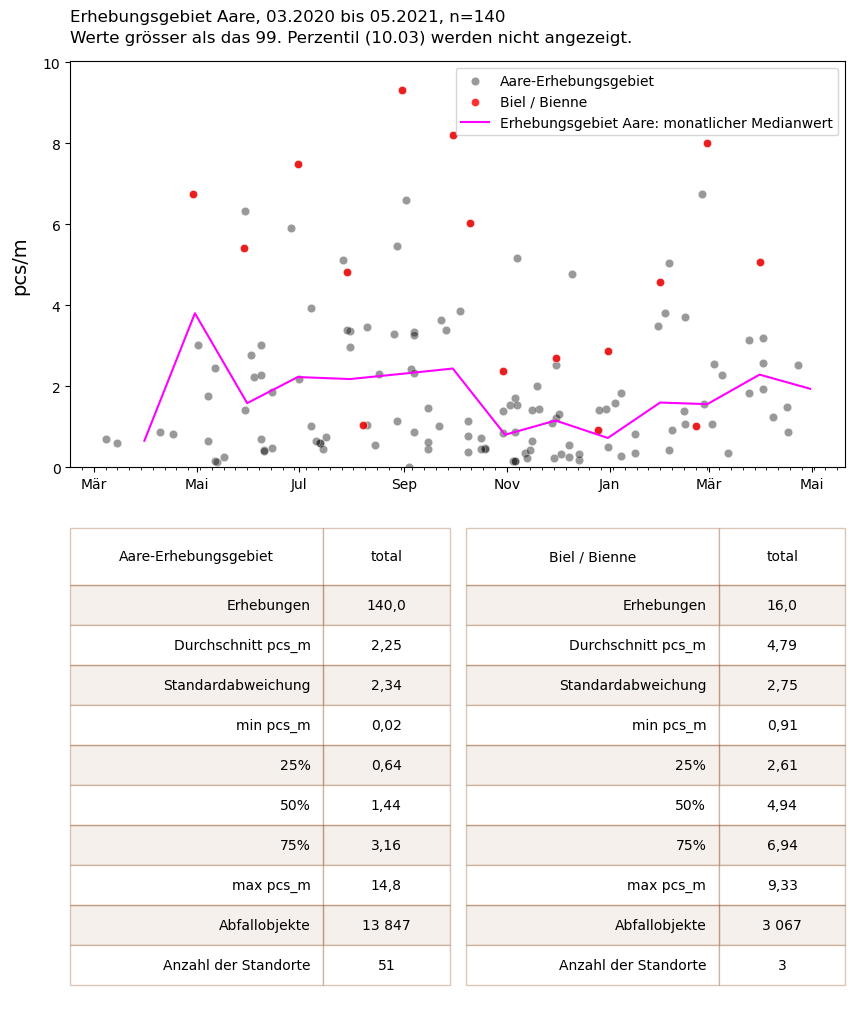

In [23]:
import resources.featuredata as featuredata
# get your data:
survey_data = pd.read_csv("resources/checked_sdata_eos_2020_21.csv")
dfBeaches = pd.read_csv("resources/beaches_with_land_use_rates.csv")
dfCodes = pd.read_csv("resources/codes_with_group_names_2015.csv")

# set the index of the beach data to location slug
dfBeaches.set_index('slug', inplace=True)

city_map = dfBeaches['city']

# make changes to code def for display
dfCodes.set_index("code", inplace=True)

# language specific
# importing german code descriptions
de_codes = pd.read_csv("resources/codes_german_Version_1.csv")
de_codes.set_index("code", inplace=True)

for x in dfCodes.index:
    dfCodes.loc[x, "description"] = de_codes.loc[x, "german"]

# there are long code descriptions that may need to be shortened for display
codes_to_change = [
    ["G704", "description", "Seilbahnbürste"],
    ["Gfrags", "description", "Fragmentierte Kunststoffstücke"],
    ["G30", "description", "Snack-Verpackungen"],
    ["G124", "description", "Kunststoff-oder Schaumstoffprodukte"],
    ["G87", "description", "Abdeckklebeband/Verpackungsklebeband"],
    ["G3","description","Einkaufstaschen, Shoppingtaschen"],
    ["G33", "description", "Einwegartikel; Tassen/Becher & Deckel"],
    ["G31", "description", "Schleckstengel, Stengel von Lutscher"],
    ["G211", "description", "Sonstiges medizinisches Material"],
    ["G904", "description", "Feuerwerkskörper; Raketenkappen"],
    ["G940", "description", "Schaumstoff EVA (flexibler Kunststoff)"]
]

# apply changes
for x in codes_to_change:
    dfCodes = sut.shorten_the_value(x, dfCodes)

# make a map to the code descriptions
code_description_map = dfCodes.description

# make a map to the code descriptions
code_material_map = dfCodes.material

dfSurveys = sut.fo_rmat_and_slice_date(survey_data.copy(), a_format="%Y-%m-%d", start_date=start_date, end_date=end_date)
dfSurveys['city'] = dfSurveys.location.map(lambda x: city_map.loc[x])
trb = dfSurveys[dfSurveys.river_bassin == levels['river_bassin']].copy()

# apply local date configuration
trb["date"] = pd.to_datetime(trb["date"], format=d)

# describe the data set:
num_obs = len(trb)
num_samps = len(trb.loc_date.unique())
num_obj = trb.quantity.sum()
num_locs = len(trb.location.unique())

# the city that we are looking at:
biel = trb[trb.city == levels['city']]

# samples at biel
biel_locd = biel.loc_date.unique()

# locations at biel
biel_loc = biel.location.unique()

# example data summary and keys
biel_t = biel.quantity.sum()

# the labels for the summary table:
unit_label= 'pcs_m'
fail_rate = 50

# select data
data = trb.groupby(['loc_date','location',  'date'], as_index=False).agg({'pcs_m':'sum', 'quantity':'sum'})

# get the basic statistics from pd.describe
d_aare = data['pcs_m'].describe().round(2)

# add project totals
d_aare['total objects'] = data.quantity.sum()
d_aare['# locations'] = data.location.nunique()

for aval in d_aare.index[:-2]:
    d_aare[aval] = featuredata.replaceDecimal(d_aare.loc[aval])
for aval in d_aare.index[-2:]:
    d_aare[aval] = featuredata.thousandsSeparator(int(d_aare.loc[aval]))

# format table one
aare_table = featuredata.changeSeriesIndexLabels(d_aare, featuredata.createSummaryTableIndex(unit_label, language="de"))
table_one =  [(x, aare_table.loc[x]) for x in aare_table.index]

# select data
db = biel.groupby(['loc_date','location',  'date'], as_index=False).agg({'pcs_m':'sum', 'quantity':'sum'})

# get the basic statistics from pd.describe
d_biel = db['pcs_m'].describe().round(2)

# add project totals
d_biel['total objects'] = db.quantity.sum()
d_biel['# locations'] = db.location.nunique()

for aval in d_biel.index[:-2]:
    d_biel[aval] = featuredata.replaceDecimal(d_biel.loc[aval])
for aval in d_aare.index[-2:]:
    d_biel[aval] = featuredata.thousandsSeparator(int(d_biel.loc[aval]))

# format table two
biel_table = featuredata.changeSeriesIndexLabels(d_biel, featuredata.createSummaryTableIndex(unit_label, language="de"))
table_two = [(x, biel_table.loc[x]) for x in biel_table.index]

# format for time series
months = mdates.MonthLocator(interval=1)
months_fmt = mdates.DateFormatter('%b')
days = mdates.DayLocator(interval=7)

# get the data
dt_all = trb.groupby(['loc_date', 'date'], as_index=False).pcs_m.sum()
bt_all = biel.groupby(['loc_date', 'date'], as_index=False).pcs_m.sum()
monthly_plot = dt_all.set_index('date', drop=True).pcs_m.resample('M').median()

# chart that
fig = plt.figure(figsize=(10, 12))

spec = GridSpec(ncols=8, nrows=18, figure=fig)
axone = fig.add_subplot(spec[0:8,:])
axtwo = fig.add_subplot(spec[9:,0:4])
axthree = fig.add_subplot(spec[9:,4:8])

sns.scatterplot(data=dt_all, x='date', y='pcs_m', color='black', alpha=0.4, label="Aare-Erhebungsgebiet", ax=axone)
sns.scatterplot(data=bt_all, x='date', y='pcs_m', color='red', alpha=0.8, label="Biel / Bienne", ax=axone)
sns.lineplot(data=monthly_plot, x=monthly_plot.index, y=monthly_plot, color='magenta', label=F"{level_names[2]}: monatlicher Medianwert", ax=axone)

the_90th = np.percentile(dt_all.pcs_m, 99)

not_included = F"Werte grösser als das 99. Perzentil ({round(the_90th, 2)}) werden nicht angezeigt."

axone.set_ylabel("pcs/m", **ck.xlab_k14)
axone.set_ylim(0,the_90th )
axone.set_title(F"{level_names[2]}, {ge_start[3:]} bis {ge_end[3:]}, n={num_samps}\n{not_included}",  **ck.title_k)
axone.xaxis.set_minor_locator(days)
axone.xaxis.set_major_formatter(months_fmt)
axone.set_xlabel("")

axtwo.set_xlabel(" ")
sut.hide_spines_ticks_grids(axtwo)
a_col = ["Aare-Erhebungsgebiet", "total"]
table1 = sut.make_a_table(axtwo, table_one,  colLabels=a_col, colWidths=[.5,.25,.25],  bbox=[0,0,1,1], **{"loc":"lower center"})

axthree.set_xlabel(" ")
sut.hide_spines_ticks_grids(axthree)
a_col = ["Biel / Bienne", "total"]
table2 = sut.make_a_table(axthree, table_two,  colLabels=a_col, colWidths=[.5,.25,.25],  bbox=[0,0,1,1], **{"loc":"lower center"})
plt.savefig("resources/output/key_indicators_data.jpeg", dpi=300)
plt.show()

In [19]:
d_aare.index

Index(['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max',
       'total objects', '# locations'],
      dtype='object')

### Die Anzahl der Proben

Die Anzahl der Proben bezieht sich auf die Anzahl der Proben innerhalb eines geografischen und zeitlichen Bereichs. Wie bereits erwähnt, kann den Ergebnissen der Analyse umso mehr Vertrauen geschenkt werden, je mehr Proben innerhalb eines bestimmten Gebiets und Zeitraums vorhanden sind. 

### Die Fail-Rate

Die Fail-Rate ist die Anzahl der Fälle, in denen ein Objekt mindestens einmal gefunden wurde, geteilt durch die Anzahl der Datenerhebungen.  

**Was bedeutet das?** Die Fail-Rate beschreibt den Prozentsatz der Fälle, in denen eine Kategorie im Verhältnis zur Anzahl der durchgeführten Datenerhebungen identifiziert wurde. 

> Verwenden Sie die Fail-Rate, um festzustellen, wie häufig ein Objekt innerhalb eines geografischen Bereichs gefunden wurde. Objekte können anhand der Fail-Rate unterschieden werden. Verwenden Sie die Fail-Rate und pcs/m, um Objekte zu identifizieren, die nur selten, aber in grossen Mengen gefunden werden. 

__Unterschiedliche Fail-Raten auf verschiedenen Ebenen__

Die Fail-Rate wird auf jeder Aggregationsebene berechnet. Daher ändert sich die Fail-Rate für ein bestimmtes Objekt je nach den geografischen Grenzen, die die Aggregationsebene definieren. Betrachten Sie alle Objekte, die bei mindestens 1/2 Erhebungen im Aare-Erhebungsgebiet gefunden wurden. 

*__Unten:__ Die Durchfallquoten der häufigsten Items aus dem Aare-Erhebungsgebiet bei verschiedenen Aggregationsstufen.*

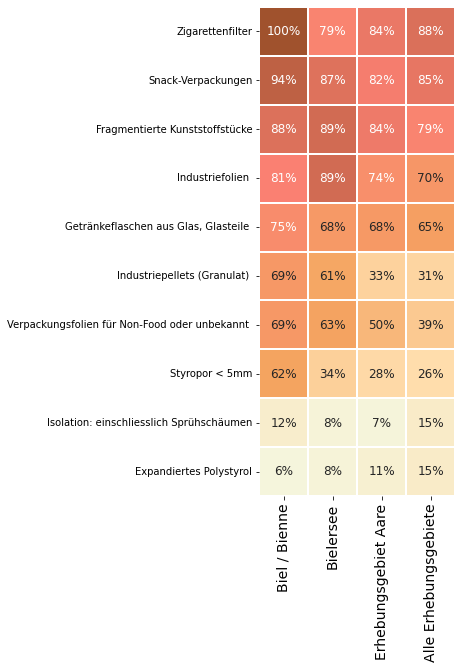

In [4]:
# identify the most common and the most abundant objects in the river bassin
trb_mc = trb.groupby(['loc_date','code'], as_index=False).agg({'fail':'sum', 'quantity':'sum', unit_label:'sum'})
trb_mcom = trb_mc.groupby('code', as_index=False).agg({'fail':'sum', 'quantity':'sum', unit_label:'median'})

# get the fail rate and separate the data into most common and most abundant
trb_mcom['f_r'] = trb_mcom.fail/trb.loc_date.nunique()

# most common
trb_grt50 = trb_mcom[trb_mcom.f_r >= fail_rate]

# most abundant
trb_pcs = trb_mcom.sort_values(by='quantity', ascending=False)

# codes from each
c_grt50 = trb_grt50.code.unique()
c_qty = trb_pcs.code.unique()[:10]

# joint list
thecommon = list(set(c_grt50) | set(c_qty))

biel_fail = biel[biel.code.isin(thecommon)].groupby('code', as_index=False).fail.sum()
biel_fail['rate'] = biel_fail.fail/biel.loc_date.nunique()
m_common = biel_fail.sort_values(by='rate', ascending=False)

m_common['label'] = 'Biel / Bienne'

# pivot that
mcp = m_common[['code', 'rate', 'label']].pivot(columns='label', index='code')

# quash the hierarchal column index
mcp.columns = mcp.columns.get_level_values(1)

def get_fail_rate(trb, obj="code", thecommon=[], level="water_name_slug", level_name=[]):
    f = trb[(trb[obj].isin(thecommon ))&(trb[level].isin(level_name))]
    tries = f.loc_date.nunique()
    fails = f.groupby(obj).fail.sum()
    return fails/tries

mcp[level_names[1]] = get_fail_rate(trb, obj="code", thecommon=thecommon, level="water_name_slug", level_name=["bielersee"])
mcp[level_names[2]] = get_fail_rate(trb, thecommon=thecommon, level="river_bassin", level_name=["aare"])
mcp[top] = get_fail_rate(dfSurveys, thecommon=thecommon, level="river_bassin", level_name=["aare", "linth", "rhone", "ticino"])

mcp["item"] = mcp.index.map(lambda x: code_description_map[x])
mcp = mcp.set_index("item").sort_values(by="Biel / Bienne", ascending=False)

# chart that
fig, ax  = plt.subplots(figsize=(len(mcp.columns)*.9,len(mcp)*.9))
axone = ax

sns.heatmap(mcp, ax=axone, cmap=cmap2, annot=True, annot_kws={"fontsize":12}, fmt=".0%", square=True, cbar=False, linewidth=.1, linecolor='white')

axone.set_xlabel("")
axone.set_ylabel("")
axone.tick_params(labelsize=10, which='both', axis='y')
axone.tick_params(labelsize=14, which='both', axis='x')

plt.setp(axone.get_xticklabels(), rotation=90)

plt.show()
plt.close()

Mit Ausnahme von Industriefolien und Kunststofffragmenten war die Fehlschlagquote in Biel / Bienne höher als in allen anderen Untersuchungsgebieten. Das bedeutet, dass die Wahrscheinlichkeit, diese Objekte zu finden, in Biel pro Untersuchung grösser war als an den meisten anderen Orten. 

Die Pass-Fail-Rate ist die wahrscheinlichste Schätzung (MLE) der Wahrscheinlichkeit, mindestens ein Objekt zu finden {cite}`mle`. Wenn das Objekt in allen vorherigen Stichproben identifiziert wurde und sich die Abschwächung der Präventionsmassnahmen nicht geändert hat, kann man davon ausgehen, dass auch in den folgenden Stichproben mindestens ein Objekt zu finden sein wird. 

__Hinweis:__ Die Fail-Rate gibt keinen Hinweis auf die Menge 

### Stücke pro Meter

Stücke pro Meter (pcs/m) ist die Anzahl der bei jeder Untersuchung gefundenen Objekte geteilt durch die Länge der untersuchten Uferlinie. 

**Was bedeutet das?** pcs/m beschreibt die Menge eines Objekts, das pro Meter vermessenen Strandufer Abschnitts gefunden wurde. Es handelt sich um eine Methode zur Normalisierung der Daten aus allen Vermessungen, damit sie verglichen werden können. 

> Verwenden Sie Stücke pro Meter, um die Objekte zu finden, die in den grössten Mengen gefunden wurden. Verwenden Sie Stücke pro Meter, um Zonen der Anhäufung zu identifizieren.

_Warum nicht die Fläche verwenden? Der empfohlene EU-Standard besteht darin, die Ergebnisse als Anzahl der Objekte pro Länge der untersuchten Küstenlinie anzugeben, normalerweise 100 Meter {cite}`eubaselines`. Die Fläche wurde für 99% aller Erhebungen in IQAASL berechnet. Die Ergebnisse für diese Analyse werden in pcs/m angegeben._

*__Unten:__ Die Durchfallquoten der häufigsten Items aus dem Aare-Erhebungsgebiet in verschiedenen Aggregationsstufen.*

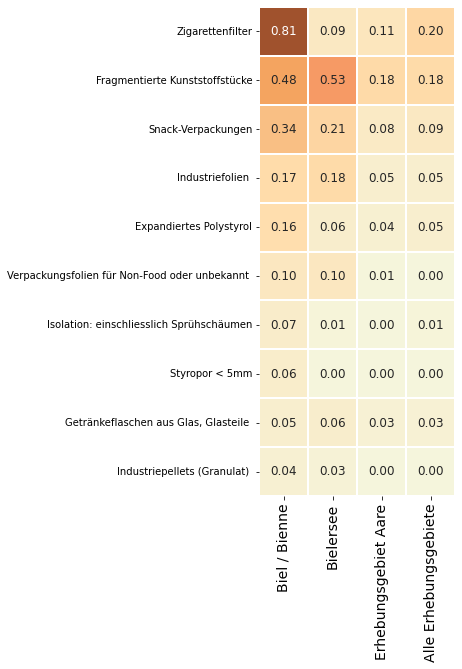

In [5]:
# aggregated survey totals for the most common codes for all the water features
# a common aggregation
group = ["loc_date", "code"]

agg_pcs_quantity = {unit_label:'sum', 'quantity':'sum'}

m_common_st = biel[biel.code.isin(thecommon)].copy()

m_c = m_common_st.groupby(['code'], as_index=False)[unit_label].median()

m_c = m_c.sort_values(by=unit_label, ascending=False)
m_c.rename(columns={unit_label:level_names[0]}, inplace=True)
m_c.set_index("code", inplace=True)

# for the lake
condition = (trb.code.isin(thecommon))&(trb.water_name_slug == 'bielersee')
m_c[level_names[1]]= sut.aggregate_to_group_name(trb[condition], unit_label=unit_label, column="code", name= level_names[1], val="med")

# for the survey area
condition = (trb.code.isin(thecommon))&(trb.river_bassin == levels["river_bassin"])
m_c[level_names[2]]= sut.aggregate_to_group_name(trb[condition], unit_label=unit_label, column="code", name= level_names[2], val="med")

# for all the data
m_c[top] = sut.aggregate_to_group_name(dfSurveys,column="code", unit_label=unit_label, name=top, val="med")

m_c["item"] = m_c.index.map(lambda x: code_description_map[x])
m_c.set_index("item", drop=True, inplace=True)

# chart that
fig, ax  = plt.subplots(figsize=(len(m_c.columns)*.9,len(m_c)*.9))

axone = ax

sns.heatmap(m_c, ax=axone, cmap=cmap2, annot=True, annot_kws={"fontsize":12}, fmt=".2f", square=True, cbar=False, linewidth=.1, linecolor='white')

axone.set_ylabel("")
axone.tick_params(labelsize=10, which='both', axis='y')
axone.tick_params(labelsize=14, which='both', axis='x')

plt.setp(axone.get_xticklabels(), rotation=90)

plt.show()
plt.close()

Der gemeldete Wert ist der Median der Datenerhebung Ergebnissen für diese Aggregationsebene und dieses Objekt. Ein Medianwert von Null bedeutet, dass das Objekt in weniger als 1/2 Datenerhebungen für diese Aggregationsebene identifiziert wurde. Betrachten Sie zum Beispiel die Ergebnisse für Isoliermaterial: umfasst Sprühschäume. Der Medianwert für das Aare-Erhebungsgebiet ist Null. Wenn jedoch nur die Ergebnisse von Bielersee oder Biel / Bienne betrachtet werden, ist der Medianwert grösser als Null. Das deutet darauf hin, dass am Bielersee und speziell in Biel / Bienne mehr Dämmstoffe gefunden wurden als im übrigen Aaregebiet. 

####  Prozentsatz der Gesamtmenge

Der prozentuale Anteil an der Gesamtzahl ist die Menge eines gefundenen Objekts geteilt durch die Gesamtzahl aller gefundenen Objekte für einen bestimmten Ort/Region und Datumsbereich. 

**Was bedeutet das?** TDer prozentuale Anteil an der Gesamtmenge beschreibt die Zusammensetzung des gefundenen Abfallobjekten.

> Verwenden Sie den prozentualen Anteil an der Gesamtmenge, um die wichtigsten Abfallobjekten zu definieren. Verwenden Sie den prozentualen Anteil an der Gesamtmenge, um Prioritäten auf regionaler Ebene zu ermitteln.

Ähnlich wie bei den Stücken pro Meter ist ein Objekt mit einer niedrigen Pass-Fail-Rate und einem hohen Prozentsatz an der Gesamtzahl ein Signal dafür, dass Objekte möglicherweise in unregelmässigen Abständen in grossen Mengen deponiert werden: Verklappung oder Unfälle. 

*__Unten:__ Die häufigsten Objekte im Untersuchungsgebiet der Aare sind  rund 66% (2'022) der Gesamtzahl der erfassten Objekte (3.067) an den drei Standorten in Biel / Bienne*

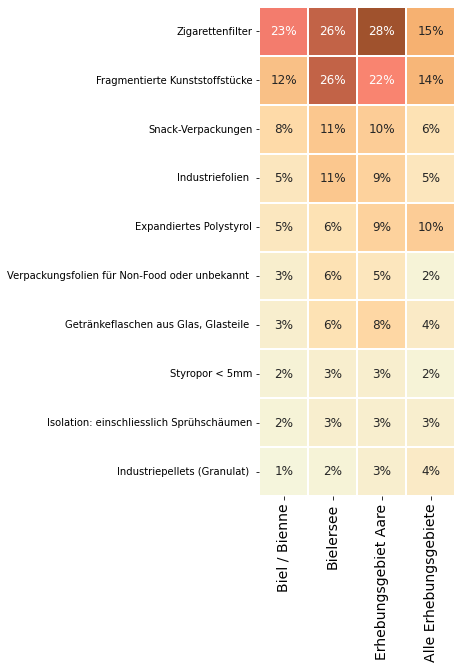

In [6]:
ac = biel[biel.code.isin(thecommon)].groupby('code', as_index=False).quantity.sum()
accounted_total = ac.quantity.sum()
ac.sort_values(by='quantity', ascending=False, inplace=True)

bsee = ac.copy()
bsee['pt'] = ac.quantity/biel.quantity.sum()
these_codes = bsee.sort_values(by='pt', ascending=False).code.unique()
bsee.sort_values(by='pt', ascending=False, inplace=True)
# bsee['item'] = bsee.code.map(lambda x: code_description_map.loc[x])
# bsee.set_index('item', inplace=True)
bsee[level_names[0]] = bsee['pt']
bsee = bsee[["code", level_names[0]]]
bsee.set_index("code", inplace=True, drop=True)

# for the lake
condition = (trb.code.isin(thecommon))&(trb.water_name_slug == 'bielersee')
bsee[level_names[1]]= sut.aggregate_to_group_name(trb[condition], unit_label=unit_label, column="code", name= level_names[1], val="pt")

# for the survey area
condition = (trb.code.isin(thecommon))&(trb.river_bassin == levels["river_bassin"])
bsee[level_names[2]]= sut.aggregate_to_group_name(trb[condition], unit_label=unit_label, column="code", name= level_names[2], val="pt")

# for all the data
bsee[top] = sut.aggregate_to_group_name(dfSurveys,column="code", unit_label=unit_label, name=top, val="pt")

bsee["item"] = bsee.index.map(lambda x: code_description_map[x])
bsee.set_index("item", drop=True, inplace=True)
# chart that
fig, ax  = plt.subplots(figsize=(len(bsee.columns)*.9,len(bsee)*.9))
axone = ax

sns.heatmap(bsee, ax=axone, cmap=cmap2, annot=True, annot_kws={"fontsize":12}, fmt=".0%", square=True, cbar=False, linewidth=.1, linecolor='white')

axone.set_ylabel("")
axone.tick_params(labelsize=14, which='both', axis='both')

plt.setp(axone.get_xticklabels(), rotation=90)
axone.tick_params(labelsize=10, which='both', axis='y')
axone.tick_params(labelsize=14, which='both', axis='x')

plt.show()
plt.close()

### Diskussion

Zwischen April 2020 und Mai 2021 wurden 16 Strand-Abfallaufkommen Datenerhebungen an drei verschiedenen Orten in Biel / Bienne durchgeführt, bei denen 3.067 Objekte identifiziert werden konnten. Die häufigsten Objekte aus dem Aare-Erhebungsgebiet machen 66% aller in Biel identifizierten Objekte aus. Objekte, die in direktem Zusammenhang mit dem Konsum stehen (Lebensmittel, Getränke, Tabak), werden in einer Häufigkeit gefunden, die über dem Median des Erhebungsgebiets liegt, den diese Objekte stellen rund 34% der gesammelten Abfallobjekte in Biel / Bienne dar, im Vergleich zu 25% für alle Untersuchungsgebiete. 

Gegenstände, die nicht direkt mit Konsumverhalten in Verbindung stehen, wie zerbrochene Kunststoffe, Industriefolien, expandiertes Polystyrol oder Industriepellets, werden in grösseren Mengen gefunden als im übrigen Aare-Erhebungsgebiet. Expandiertes Polystyrol wird als äussere Isolierhülle für Gebäude (Neubauten und Renovierungen) und zum Schutz von Bauteilen beim Transport verwendet. Biel hat eine starke industrielle Basis und eine aktive Bau- und Produktionsbasis. Zusammengenommen machen diese Objekte 30% der insgesamt gesammelten Objekte aus. 

#### Anwendung 

Die Schlüsselindikatoren sind einfache Verhältnisse, die direkt aus den Datenerhebung Ergebnissen entnommen werden. Änderungen in der Grössenordnung dieser Verhältnisse signalisieren Änderungen in der relativen Menge bestimmter Objekte. Wenn die Schlüsselindikatoren im Rahmen eines Überwachungsprogramms verwendet werden, ermöglichen sie die Identifizierung wahrscheinlicher Anreicherungszonen. 

###  Praktische Übung

Industrielle Kunststoffgranulate (GPI) sind das wichtigste Material zur Herstellung von Kunststoffgegenständen, die in der Schweiz in grossem Umfang verwendet werden. Sie sind scheiben- oder pelletförmig und haben einen Durchmesser von 5mm. 

Beantworten Sie anhand der folgenden Datenerhebung Ergebnissen, der Karte mit den Datenerhebungs Standorten und unter Beibehaltung der zu Beginn dieses Artikels vorgestellten Annahmen die folgenden Fragen: 

1. Wo besteht die grösste Wahrscheinlichkeit, mindestens ein Vorkommen des Abfallobjekts zu finden? 
2. Wie gross ist die wahrscheinliche Mindestmenge an Pellets, die Sie bei einer Untersuchung von 50 Metern finden würden? 
3. Warum haben Sie sich für diesen Ort oder diese Orte entschieden? Wie sicher sind Sie sich bei Ihrer Wahl? 

In [7]:
aggs = {'loc_date':'nunique', 'fail':'sum', 'pcs_m':'mean', "quantity":"sum"}
new_col_names = {"loc_date":"Proben", "fail":"# fail", "pcs_m":"median pcs/m", "quantity":"# gefunden"}

biel_g95 = dfSurveys[(dfSurveys.water_name_slug == levels['water_name_slug'])&(dfSurveys.code == 'G112')].groupby(['location']).agg(aggs)
biel_g95.rename(columns=new_col_names, inplace=True)

biel_g95

,Proben,# fail,median pcs/m,# gefunden
location,,,,
bielersee_vinelz_fankhausers,12,9,0.1275,22
camp-des-peches,1,0,0.0000,0
erlach-camping-strand,1,0,0.0000,0
gals-reserve,2,0,0.0000,0
ligerz-strand,2,0,0.0000,0
luscherz-plage,4,2,0.0150,3
luscherz-two,1,0,0.0000,0
mullermatte,12,9,0.0725,37
nidau-strand,1,1,0.0800,2


<br></br>

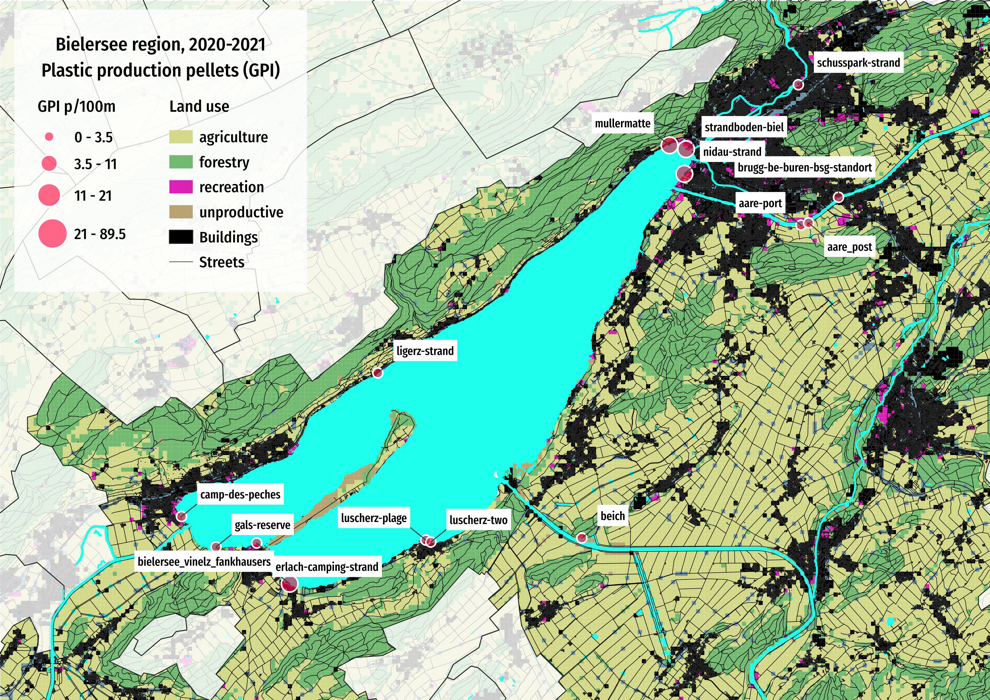

In [8]:
sut.display_image_ipython("resources/maps/key_indicators.jpeg", thumb=(1200, 700))